In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wm = np.random.rand(2, 2)
print(wm.shape)

(2, 2)


In [3]:
def Perzeptron(x, w):
    out= x.T @ w#2,1->1,2 x 2,2 -> 1,2
    return out

In [4]:
#
#Jetzt haben wir schon mal den forwardpass für ein Perzeptron
#

In [5]:
#wir verwenden den mittleren quadratischen fehler als Loss

In [6]:
def calc_loss(x,y):
    return .5*(y-x)**2
#damit haben wir dann schon mal den Loss

In [7]:
 #wir benutzen nach newton das gradientenverfahren um das lokale minimum zu erreichen
        #wir haben als funktion:
        #y = w * x
        #der fehler ist L = 1/2(Y-y)^2
        #also ist L = (Y-(w * x))^2
        #wir müssen also partiell nach w ableiten
        #fangen wir mal an:
        #wir wollen dL/dw = dL/dy * dy/dw: alsoooo:
        #dL/dy = 1/2(Y^2 - 2Yy +y^2)'
        #      = 1/2(0 - 2Y +2y)
        #      = y-Y
        #dy/dw = x
        #damit ist dL/dw = x*(y-Y)
def backward(x, y, Y):
    return x * (y- Y)

#backward ist auch erledigt!

In [8]:
#und jetzt müssen wir noch die parameter updaten- dafür wollen wir nicht zum MAXIMUM sondern zum MINIMUM
#das erreichen wir indem wir den gradienten von unseren gewichten abziehen
def step(wm, grd, lr):
    return wm - lr*grd

In [9]:
x = np.array([[[1], [1]],[[1], [0]],[[0], [1]], [[0],[0]]])#Dummy data
y = np.array([[0], [1], [1], [0]])#dummy target

In [10]:
wm2 = np.random.rand(2, 1)


In [11]:
losses= []
ls = 0
for epoch in range(100):    
    for i in range(len(x)):
        out1 = Perzeptron(x[i], wm)
        out2 = Perzeptron(out1.T, wm2)
        loss = .5*(y[i]-out2)**2#was ist unser loss? (hier erstmal irrelevant- wird in späteren projekten wichtig
        grd = backward(x[i], out2, y[i])#backward
        wm2 = step(wm2, grd, 1e-2)#update der parameter
        grd2 = (y[i]-out2)*(wm2)*x[i]        
        wm = step(wm, grd2, 1e-2)
        ls += loss# wir rechnen erstmal den ganzen loss zusammen
    losses.append(ls.squeeze()/len(x))#dann gucken wir wie groß der mittlere fehler auf den daten ist und merken uns das
    ls = 0# dann mal den laufparameter auf null setzen

In [14]:
#L = 1/2(Y-y)^2
#y = w1*z
#z = w2*x
#dL/dw2 = dL/dy*dy/z*dz/dw2
#dL/dy = Y-y
#dy/dz = w1
#dz/dw2 = x
#dL/dw2 = (Y-y)(w1)(x)

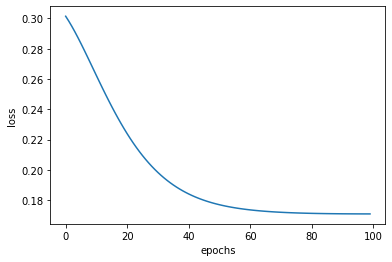

In [13]:
plt.plot(np.arange(len(losses)), losses)#wir plotten alle losses
plt.xlabel("epochs")#xlabel
plt.ylabel("loss")#ylabel
plt.show()#anzeigen